# Gauteng residential properties: Effects of the property's features on price
### by (Nkhesani Lilokoe)


## Investigation Overview

The main goal of this investigation was to get a better understanding of the Gauteng residential properties market terms of pricing and what features influence or affect the price.  The main features were property type, the number of rooms(bedrooms and bathrooms), the floor size/ erf size and location. 


## Dataset Overview

The data set that I used contains prices and attributes of around 97000 properties that were scraped from the biggest property South African online real estate portal. More than a quarter of the data properties were dulpicates and the key features were missing on some rows so after cleaning we are working with ~26000 properties. This data has 12 columns and 10 features that I will be working with. Most of the feature are numeric. There are 2 boolean columns- 'Under Offer?' and 'Reduced?. We also have the column Id with unique values that will be used as the property identifier and the Url if anyone wants to see the houses/flats.


# Market data of Gauteng surburbs' residetial property


## Introduction

The following investigation will look at the characteristiccs that could be used to predict the prices of residetial property that were advertised for sale(property under offer and those still waiting for interested partied) by the second week of October 2021.The feature of interest is the price and the following features will be used to form part of the investigation: Price/m^2, type of property, number of bedroom and bathrooms.  We will also investigate which property type is value for more based on price/m^2 of residential property sold in surburbs with more than 200 properties in the market to see which location and property type gives value for money.  



## Preliminary Wrangling

The data set that we'll use contains prices and attributes of around 97000 properties that were scraped from the biggest property South African online real estate portal. Some of the key features were missing on some rows so after cleaning we are working with ~26000 properties.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_colwidth',-1)
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
sb.__version__


'0.8.1'

## Loading and cleaning the data

In [2]:
#loading the property data
property=pd.read_csv('props27.csv')
property.head()


,Id,Surburb,Address,Type,Bedrooms,Bathrooms,Parking Spaces,Floor Size,Erf Size,Price,Description,Under Offer?,Reduced?,Url
0,109756117,Beverley,7 Robert Bruce Rd,House,4.00000,5.50000,2.00000,nan,607.00000,4999000.00000,4 Bedroom House,False,True,/for-sale/beverley/sandton/gauteng/5248/109756117
1,110349386,Terenure,NaN,House,nan,nan,nan,nan,nan,2850000.00000,House,True,False,/for-sale/terenure/kempton-park/gauteng/1367/110349386
2,109919631,Newtown,NaN,Apartment,2.00000,2.50000,2.00000,132.00000,nan,1000000.00000,2 Bedroom Apartment,False,False,/for-sale/newtown/johannesburg/gauteng/3869/109919631
3,110375990,Pretoria West,NaN,House,3.00000,nan,1.00000,nan,80.00000,1266397.00000,3 Bedroom House,False,False,/for-sale/pretoria-west/pretoria/gauteng/2924/110375990
4,110590096,Waterfall Country Estate,NaN,House,5.00000,5.50000,2.00000,nan,1042.00000,6999000.00000,5 Bedroom House,False,False,/for-sale/waterfall-country-estate/midrand/gauteng/15697/110590096


In [3]:
property['Floor Size'] =property['Floor Size'].fillna(0)
property['Erf Size'] =property['Erf Size'].fillna(0)
property['Parking Spaces'] =property['Parking Spaces'].fillna(0)


In [4]:
property["Floor/Erf_size"] =property["Floor Size"] + property["Erf Size"]
property["Price/m^2"] =property["Price"] / property["Floor/Erf_size"]
property['Price/m^2'] =property['Price/m^2'].replace([1, 4],'10000')

property=property.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

property.head()


,Id,Surburb,Address,Type,Bedrooms,Bathrooms,Parking Spaces,Floor Size,Erf Size,Price,Description,Under Offer?,Reduced?,Url,Floor/Erf_size,Price/m^2
0,109756117,Beverley,7 Robert Bruce Rd,House,4.00000,5.50000,2.00000,0.00000,607.00000,4999000.00000,4 Bedroom House,False,True,/for-sale/beverley/sandton/gauteng/5248/109756117,607.00000,8235.58484
8,110456883,Suiderberg,712 Daphne Ave,House,3.00000,2.00000,2.00000,0.00000,1001.00000,2300000.00000,3 Bedroom House,False,False,/for-sale/suiderberg/pretoria/gauteng/295/110456883,1001.00000,2297.70230
14,109291033,Daveyton,35 Kingsway Road,House,2.00000,1.00000,0.00000,0.00000,300.00000,859000.00000,2 Bedroom House,False,False,/for-sale/daveyton/benoni/gauteng/2198/109291033,300.00000,2863.33333
16,110581078,Boskruin,186 Kowie Street,House,4.00000,2.00000,8.00000,0.00000,1495.00000,1670000.00000,4 Bedroom House,False,False,/for-sale/boskruin/randburg/gauteng/4417/110581078,1495.00000,1117.05686
17,109856637,Maboneng,11 Kruger Street,Apartment,0.50000,1.00000,0.00000,26.00000,0.00000,395000.00000,0.5 Bedroom Apartment,False,False,/for-sale/maboneng/johannesburg/gauteng/17453/109856637,26.00000,15192.30769


In [5]:
property.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57535 entries, 0 to 239293
Data columns (total 16 columns):
Id                57535 non-null int64
Surburb           57535 non-null object
Address           57535 non-null object
Type              57535 non-null object
Bedrooms          57535 non-null float64
Bathrooms         57535 non-null float64
Parking Spaces    57535 non-null float64
Floor Size        57535 non-null float64
Erf Size          57535 non-null float64
Price             57535 non-null float64
Description       57535 non-null object
Under Offer?      57535 non-null bool
Reduced?          57535 non-null bool
Url               57535 non-null object
Floor/Erf_size    57535 non-null float64
Price/m^2         57535 non-null object
dtypes: bool(2), float64(7), int64(1), object(6)
memory usage: 6.7+ MB


I will drop some columns, (Describe and Address) to remain with only relevant features for the project. I also added a new column combinng  'Erf Size'- for houses, 'Floor Size'- fpr apartments/flats. Converted the Id column from int to str because the ID is an identifier and wont be used in any calculations. Parking spaces is missing in a lot of propert 

In [6]:
property.drop(['Description', 'Address', 'Erf Size', 'Floor Size'],axis=1, inplace=True)
property['Id'] = property['Id'].astype(str)


In [7]:
property['Price/m^2'] = property['Price/m^2'].astype(float)

Removing all the duplicated properties by Id. Ids are meant to be unique to each property.  I will also drop all non residential properties that didnt fall out from  'Erf Size', 'Floor Size' filter. 

In [8]:
print(property.Id.duplicated().sum())
property.Type.unique()

29691


array(['House', 'Apartment', 'Townhouse'], dtype=object)

In [9]:
#removing all the duplicated properties by Id, non residential properties and those without prices as that will be our dependant feature.
property=property.drop_duplicates(subset=['Id'])
disallowed_prop_types=['Industrial Property', 'Vacant Land', 'Commercial Property','Farm']
property = property[property.Type.isin(disallowed_prop_types) == False]

property.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27844 entries, 0 to 239273
Data columns (total 12 columns):
Id                27844 non-null object
Surburb           27844 non-null object
Type              27844 non-null object
Bedrooms          27844 non-null float64
Bathrooms         27844 non-null float64
Parking Spaces    27844 non-null float64
Price             27844 non-null float64
Under Offer?      27844 non-null bool
Reduced?          27844 non-null bool
Url               27844 non-null object
Floor/Erf_size    27844 non-null float64
Price/m^2         27844 non-null float64
dtypes: bool(2), float64(6), object(4)
memory usage: 2.4+ MB


Did a data exploratory analysis and found that some properties had an unrealistic/unintepretable number of bathrooms. Like 1.2 Bathrooms or 40 bathooms in a 2 bedroom flat that's 65m^2. So I filtered out those numbers. 

In [10]:
#Filter out weird number of bathroom values.
weird_bath=[20, 22, 11, 1.2, 2.1, 3.2, 2.2, 4.4, 5.2, 25, 35, 40] 
weird_park=[0.5, 1.5, 2.5,6.5, 4.5,8.5,3.5 ]
property = property[property.Bathrooms.isin(weird_bath) == False]
property = property[property['Parking Spaces'].isin(weird_park) == False]
#Removing properties without a price
property = property[property['Price'].notna()]
property.info()
property.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27815 entries, 0 to 239273
Data columns (total 12 columns):
Id                27815 non-null object
Surburb           27815 non-null object
Type              27815 non-null object
Bedrooms          27815 non-null float64
Bathrooms         27815 non-null float64
Parking Spaces    27815 non-null float64
Price             27815 non-null float64
Under Offer?      27815 non-null bool
Reduced?          27815 non-null bool
Url               27815 non-null object
Floor/Erf_size    27815 non-null float64
Price/m^2         27815 non-null float64
dtypes: bool(2), float64(6), object(4)
memory usage: 2.4+ MB


,Bedrooms,Bathrooms,Parking Spaces,Price,Floor/Erf_size,Price/m^2
count,27815.00000,27815.00000,27815.00000,27815.00000,27815.00000,27815.00000
mean,2.91141,2.06960,1.95973,2042669.54330,1555.42466,17720.88010
std,1.87895,1.43132,2.01732,2858068.45772,19126.84341,261288.69215
min,0.50000,0.50000,0.00000,7500.00000,1.00000,0.75000
25%,2.00000,1.00000,1.00000,730000.00000,83.00000,2832.27160
50%,3.00000,2.00000,2.00000,1200000.00000,200.00000,6567.16418
75%,3.00000,2.50000,2.00000,2295000.00000,780.50000,11445.11379
max,97.00000,80.00000,60.00000,75000000.00000,1700000.00000,24300000.00000


I went on to check the max and min values of the numerical variables. The max bedrooms, bathrooms and Parking spaces were 186, 80 and 111 respectively. so I explored to see what type of houses these were with so many rooms using their url. I found that properties with too many rooms were lodges, student accomodations, houses converted into business sites, land with rental flat plans or town houses accounting for the whole complex instead of he unit. I decided to explore from 20 going down. If I sample 10% of the properties and find that more that 20% are not primarily for a household, I would move to a lower number until I got to 10 rooms, 12 parking spaces . That is where my methodology passed. 


In [11]:
# Exploring code
burb=property[(property['Price/m^2'] <1000 )]
t=burb[["Url"]]            
#t

In [12]:
property=property[(property.Bedrooms < 11)] 
property=property[(property.Bedrooms != 3.4)] 
property=property[(property['Parking Spaces'] < 13)] 
property=property[(property['Floor/Erf_size'] < 150000)] 
property=property[property['Floor/Erf_size'].isin([1,2,3,4,5])==False]
property=property[property['Bathrooms'].notna()]
property.describe()

,Bedrooms,Bathrooms,Parking Spaces,Price,Floor/Erf_size,Price/m^2
count,27452.00000,27452.00000,27452.00000,27452.00000,27452.00000,27452.00000
mean,2.83367,2.02268,1.90307,2001857.58276,1124.20414,8421.99446
std,1.21739,1.13881,1.76067,2734242.87436,4925.94692,12262.15754
min,0.50000,0.50000,0.00000,7500.00000,7.00000,0.75000
25%,2.00000,1.00000,1.00000,730000.00000,84.00000,2864.00252
50%,3.00000,2.00000,2.00000,1200000.00000,200.00000,6578.94737
75%,3.00000,2.00000,2.00000,2250000.00000,755.00000,11400.00000
max,10.00000,12.00000,12.00000,75000000.00000,133300.00000,590909.09091


In [13]:
#removing un unnecesary price tail
property = property[(property['Price'] < 20_000_000)]  
property = property[(property['Price'] > 100_000)] 
property.describe()


,Bedrooms,Bathrooms,Parking Spaces,Price,Floor/Erf_size,Price/m^2
count,27370.00000,27370.00000,27370.00000,27370.00000,27370.00000,27370.00000
mean,2.82797,2.01337,1.89437,1916671.41440,1117.71001,8379.65230
std,1.21334,1.12567,1.75121,2095093.19858,4925.22304,12201.75134
min,0.50000,0.50000,0.00000,120000.00000,7.00000,4.24098
25%,2.00000,1.00000,1.00000,729000.00000,84.00000,2855.98830
50%,3.00000,2.00000,2.00000,1200000.00000,200.00000,6562.50000
75%,3.00000,2.00000,2.00000,2250000.00000,746.75000,11375.00000
max,10.00000,12.00000,12.00000,19999000.00000,133300.00000,590909.09091


In [14]:
#property.drop(['Url'],axis=1, inplace=True)
property.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27370 entries, 0 to 239273
Data columns (total 12 columns):
Id                27370 non-null object
Surburb           27370 non-null object
Type              27370 non-null object
Bedrooms          27370 non-null float64
Bathrooms         27370 non-null float64
Parking Spaces    27370 non-null float64
Price             27370 non-null float64
Under Offer?      27370 non-null bool
Reduced?          27370 non-null bool
Url               27370 non-null object
Floor/Erf_size    27370 non-null float64
Price/m^2         27370 non-null float64
dtypes: bool(2), float64(6), object(4)
memory usage: 2.3+ MB


In [15]:
# Exploring code
burb=property[(property['Parking Spaces'] == 6.5)]
u=burb[["Url"]]            
#u

In [16]:

prop = property.groupby('Surburb').size()
surburbs_with_more_than_one_props = prop[prop<40]
surburb_to_remove=surburbs_with_more_than_one_props.index.tolist() 
propt=property[property.Surburb.isin(surburb_to_remove)== False]




In [17]:
propt.nunique()

Id                16929
Surburb           173  
Type              3    
Bedrooms          15   
Bathrooms         20   
Parking Spaces    13   
Price             1771 
Under Offer?      2    
Reduced?          2    
Url               16929
Floor/Erf_size    1975 
Price/m^2         10234
dtype: int64

In [18]:
property.nunique()

Id                27370
Surburb           1396 
Type              3    
Bedrooms          15   
Bathrooms         22   
Parking Spaces    13   
Price             2347 
Under Offer?      2    
Reduced?          2    
Url               27370
Floor/Erf_size    2839 
Price/m^2         16342
dtype: int64

### What is the structure of your dataset?

This data has 12 columns and 10 features that I will be working with. Most of the feature are numeric, there are 2 boolean columns- Under Offer and reduced. We also have the column Id with unique values that will be used as the property identifier and the Url if anyone wants to see the houses/flats. 

### What is/are the main feature(s) of interest in your dataset?

I am interested in knowing what which features influence the price of residential houses and findin locations that value for money.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Number of bedrooms, number of bathrooms, Price/m^2 , location, etc


## Univariate Exploration

I did all the cleaning above. 


## Key definitions:

1. House: A residential property with its own plot/land. 
2. Townhouse: A residential property within a complex of around 20-30 houses where the resident owns their house/apartment but share te common areas within the bounds of the complex. 
3. Apartment(aka flat): Bachelor or residential place that is one of many in a larger building with one or more bedrooms.

## Assortment in the residential property market? 


Looking at the residential property market assortment, we can see that there are more free standing houses in the property residential market of Gauteng province, followed by apartments then townhouses. 

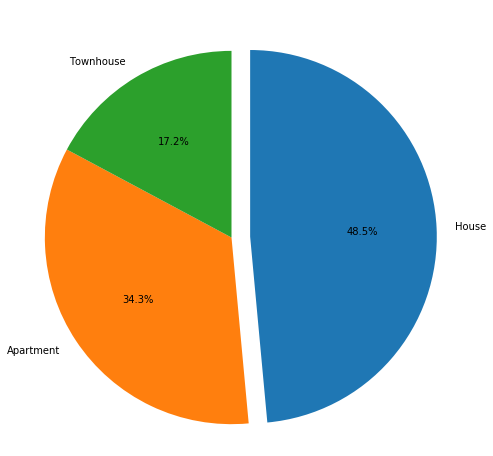

In [19]:
plt.figure(figsize=[12, 8])
sorted_counts = property['Type'].value_counts()
explode = [0.1, 0.0, 0.0]
plt.pie(sorted_counts, labels = sorted_counts.index,explode =explode,autopct='%1.1f%%', startangle = 90, counterclock = False);

plt.axis('square');


In [20]:
def plot_histogram(df, x, bins, xlabel, ylabel, title, size, is_plain=True):
    plt.figure(figsize=size)
    plt.hist(data =df , x = x, bins=bins)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.title(title, fontsize=15, bbox={'facecolor':'0.8', 'pad':5})
    if is_plain:
        plt.ticklabel_format(style = 'plain')
    plt.show()

## Price Distribution of Gauteng residential properties

Property prices in the data used ranged from as low as R120,000 to millions of rands. On a logged scale, the distribution looks bimodal ud builds up to a bell shape peaking at around R650,000. Looking at price/m^2, there's a distinctive spike around 4,000/m^2 whilst most bulge around R10,000.

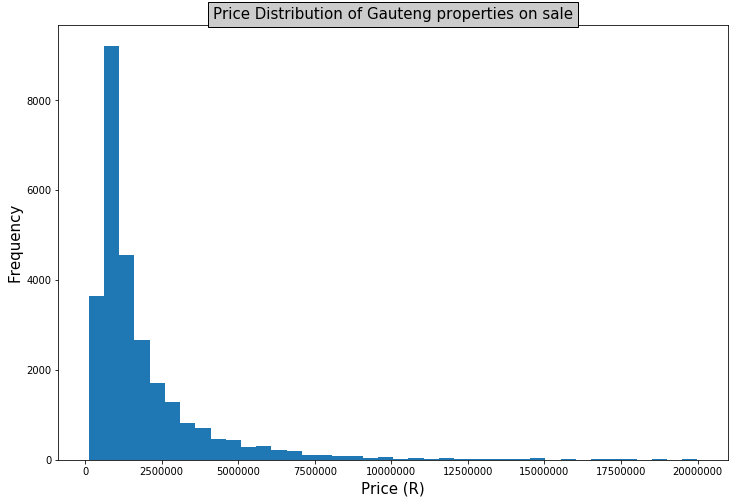

In [21]:

plot_histogram(property, 'Price', 40, 'Price (R)','Frequency', 'Price Distribution of Gauteng properties on sale', [12,8])

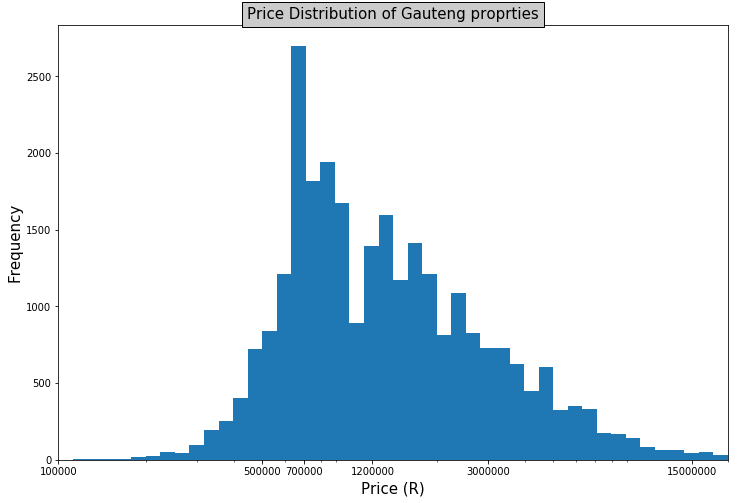

In [22]:
plt.figure(figsize=[12, 8])
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(property['Price'].max())+log_binsize, log_binsize)
plt.hist(data = property, x = 'Price', bins=bins)
plt.xscale('log')
plt.ylabel('Frequency',fontsize=15)
plt.xlabel('Price (R)',fontsize=15)
plt.xlim(100000,20000000)
plt.title('Price Distribution of Gauteng proprties',fontsize=15,bbox={'facecolor':'0.8', 'pad':5})
ticks = [100000, 500000, 700000, 1200000, 3000000, 15000000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);
plt.show()

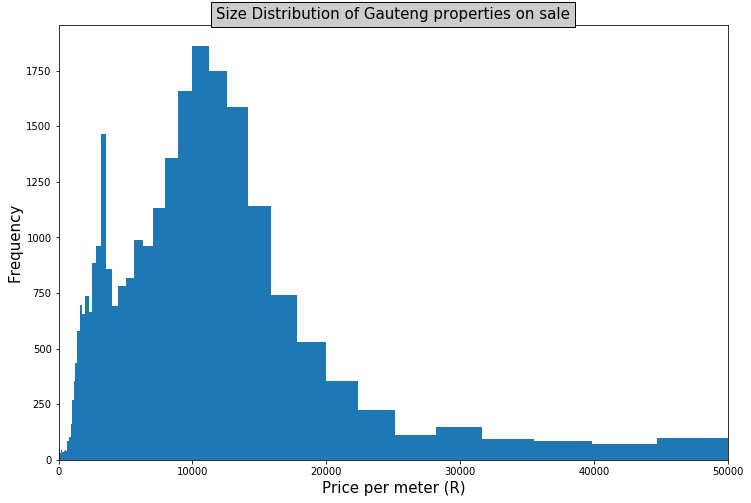

In [23]:
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(property['Price/m^2'].max())+log_binsize, log_binsize)
plt.figure(figsize=[12, 8])
plt.hist(data =property , x = 'Price/m^2', bins=bins);
plt.xlabel('Price per meter (R)',fontsize=15)
plt.xlim(0,50000)
#ticks = [10000, 50000, 100000, 500000, 3000000, 600000]
plt.ylabel('Frequency',fontsize=15)
plt.title('Size Distribution of Gauteng properties on sale', fontsize=15, bbox={'facecolor':'0.8', 'pad':5})
plt.ticklabel_format(style = 'plain')
plt.show()

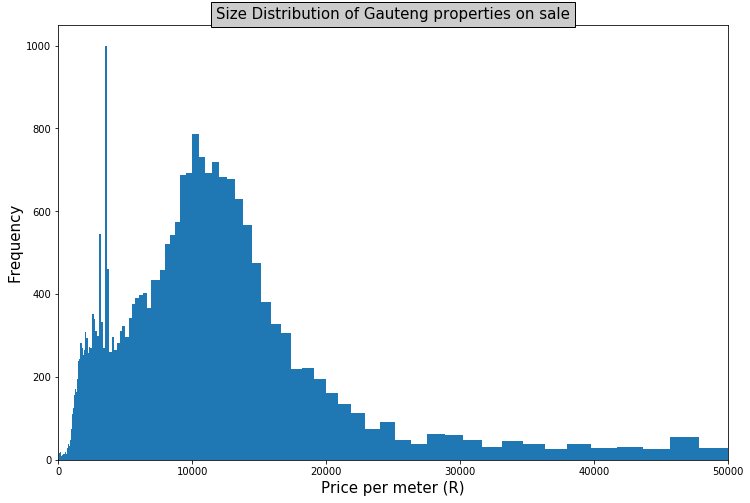

In [24]:
log_binsize = 0.02
bins = 10 ** np.arange(0, np.log10(property['Price/m^2'].max())+log_binsize, log_binsize)
plt.figure(figsize=[12, 8])
plt.hist(data =property , x = 'Price/m^2', bins=bins);
plt.xlabel('Price per meter (R)',fontsize=15)
plt.xlim(0,50000)
#ticks = [10000, 50000, 100000, 500000, 3000000, 600000]
plt.ylabel('Frequency',fontsize=15)
plt.title('Size Distribution of Gauteng properties on sale', fontsize=15, bbox={'facecolor':'0.8', 'pad':5})
plt.ticklabel_format(style = 'plain')
plt.show()

The property price distribution has a long-tailed distribution, with a lot of the properties on the low price end (around 700-1 mil), and some dripping towards the hundred millions. I cleaned some of the outliers off. I logged the prices to smooth out the skewness and I got a bell-like shape centering around the the hundred thousands below 1 mil with the highest steep between 600-700 thousand. I also looked at the price per meter squared to check the disribution of propery size value. Using a bigger bin, the graph is right skewed with a bulge was around 10K per square meter with a long tail ro the higher numbers. I was interested in the spike that was around 4K and made a smaller bin to see if there was significance. I found that the around 4K had the highest peak. 

# Variables of interest and other explorations. 

## 1. Number of bedrooms 2. Number of Bathrooms 3. Number of parking spaces. 

What is the frequency of these rooms in properties?

In [25]:
#function
def plot_bargraph(df, x, xlabel, ylabel, title, size, is_plain=True):
    plt.figure(figsize=size)
    base_color = sb.color_palette()[2]
    ordered = property[x].value_counts().index
    sb.countplot(data=df, x = x, color=base_color,order= ordered)
    plt.title(title, fontsize=15, bbox={'facecolor':'0.8', 'pad':5})
    plt.ylabel(ylabel,fontsize=15);
    plt.xlabel(xlabel,fontsize=15);
 
 




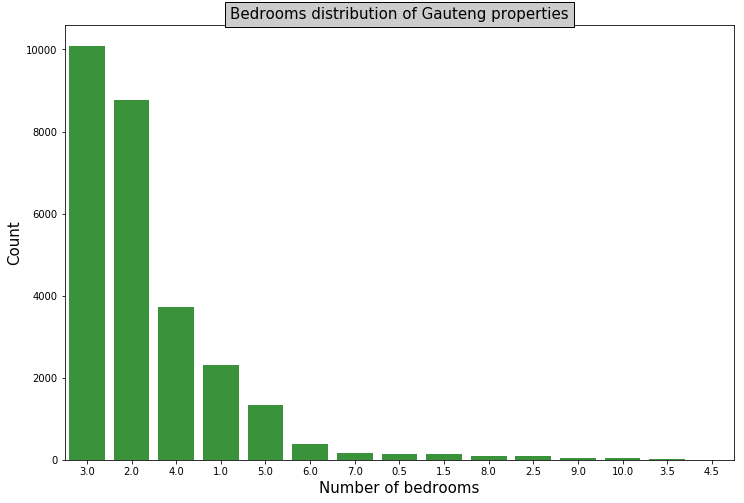

In [26]:


plot_bargraph(property, 'Bedrooms', 'Number of bedrooms', 'Count', 'Bedrooms distribution of Gauteng properties', [12,8])


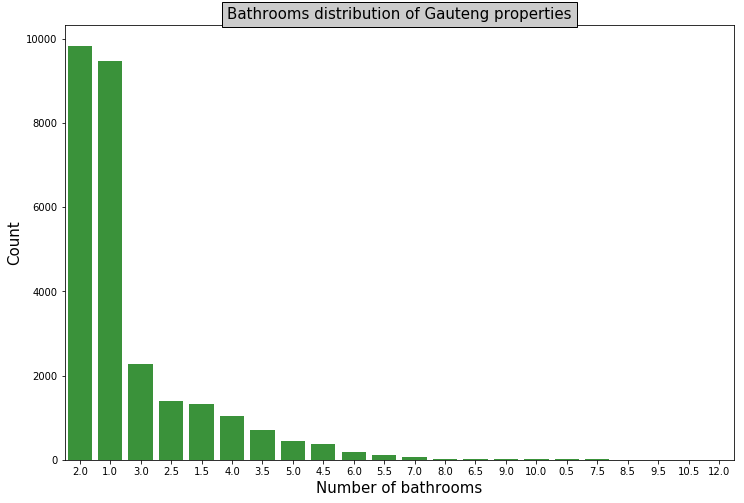

In [27]:

plot_bargraph(property, 'Bathrooms', 'Number of bathrooms', 'Count', 'Bathrooms distribution of Gauteng properties', [12,8])

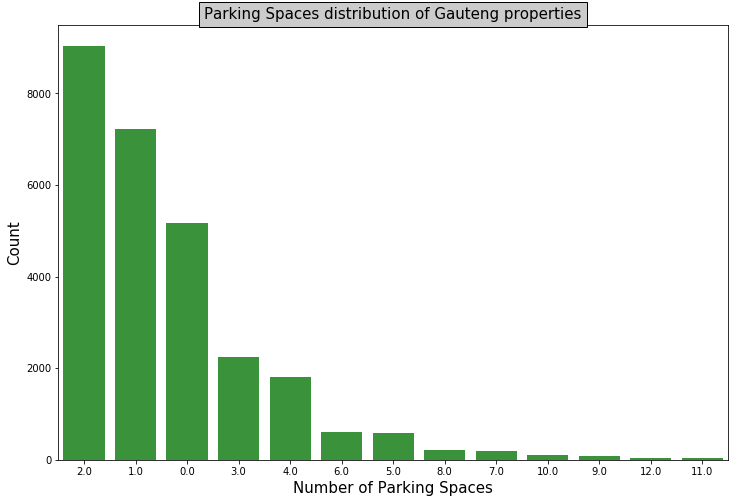

In [28]:
plot_bargraph(property, 'Parking Spaces', 'Number of Parking Spaces', 'Count', 'Parking Spaces distribution of Gauteng properties', [12,8])

I used bar graphs for all of them because after removing unrealistic rom/spaces values like value point something (expect for point 5's in bathrooms and bedrooms), most were whole numbers. 0.5 bathrooms mean that there's only a toilet and not shower and or bath. And point 0.5 edrooms are studies or achelor flats. 

### Bedrooms
An average residential property in Gauteng surburds has 3 bedrrooms, fllowed closely by 2 bedrooms. The least number of rooms in a property was 4.5


### Bathrooms
2 bathrooms was the average number of bathrooms in a property peole call home, closelt followed by 1 and 12 being the lowest.   


### Garages/ carpots area
The highest count of parking spaces in properties is 2. 


Interesting to note that the highest averages were the same pre and post cleaning. The methodology used allowed the number to go up to 12 but 11 was the least average number of bathrooms in the properties.

### Other factors I thought would be interesting
#### 1. Price reduction:
whilst people who want to sell fast put their prices at ready to go pricing, some people realise after a bit of not getting interested buyers that they can benefit from a "sale' and reduce their asking offers. But that is a very small proportion as we can se below. Interested to see what proportion of "Reduced" properties go into "under offer" which will be explored in the bivariant section. 

2. Under offer properties are fewer than the ones still looking for buyers. I assumed this is normal since they remove sold houses within a week of finalization. 


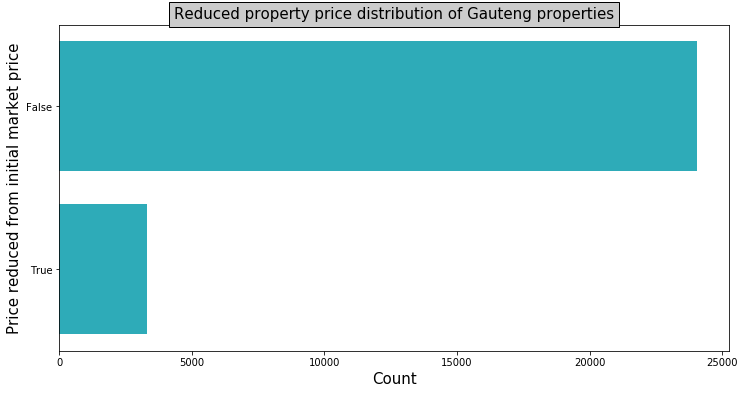

In [29]:

plt.figure(figsize=[12, 6])
base_color = sb.color_palette()[9]
ordering = property['Reduced?'].value_counts().index
ordered = property['Reduced?'].value_counts().index
sb.countplot(data=property, y = 'Reduced?', color=base_color,order= ordered)

plt.title('Reduced property price distribution of Gauteng properties', fontsize=15, bbox={'facecolor':'0.8', 'pad':5})
#plt.xlim(1)
plt.ylabel('Price reduced from initial market price',fontsize=15);
plt.xlabel('Count',fontsize=15);


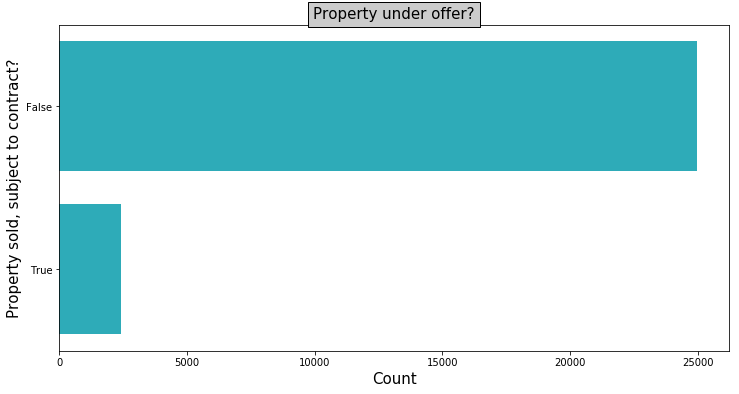

In [30]:
plt.figure(figsize=[12, 6])
base_color = sb.color_palette()[9]
ordering = property['Under Offer?'].value_counts().index
ordered = property['Under Offer?'].value_counts().index
sb.countplot(data=property, y = 'Under Offer?', color=base_color,order= ordered)

plt.title('Property under offer?', fontsize=15, bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Property sold, subject to contract?',fontsize=15);
plt.xlabel('Count',fontsize=15);


### Location! Location! Location!

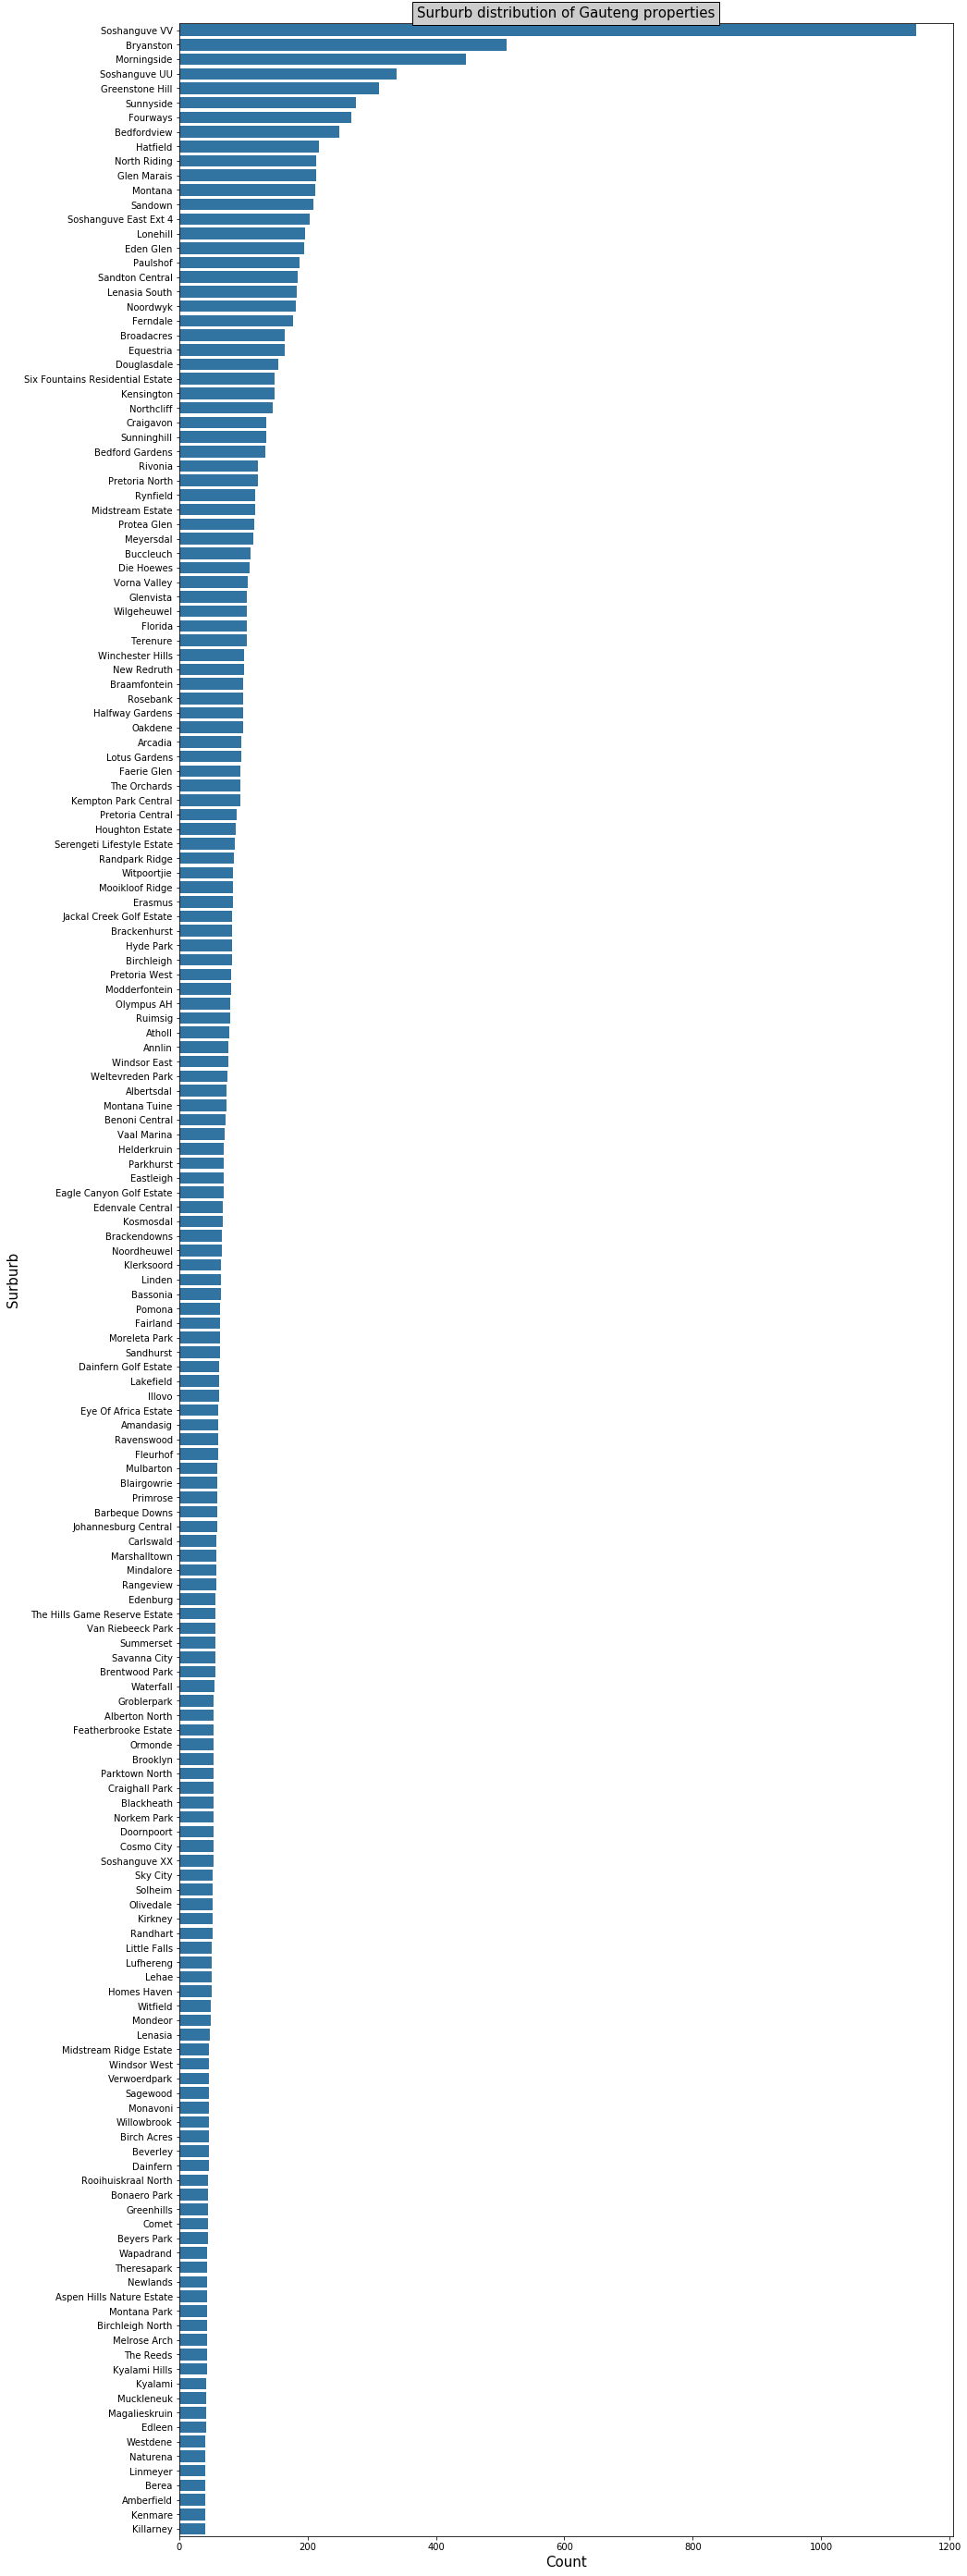

In [31]:

plt.figure(figsize=[15, 50])
base_color = sb.color_palette()[0]
ordering = propt['Surburb'].value_counts().index
ordered1 = propt['Surburb'].value_counts().index
sb.countplot(data=propt, y = 'Surburb', color=base_color,order= ordered1)

plt.title('Surburb distribution of Gauteng properties', fontsize=15, bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Surburb' ,fontsize=15);
plt.xlabel('Count',fontsize=15);

In [32]:
top_selling_10_surburbs=propt[propt['Surburb'].isin(ordered1[:15])]
top_selling_10_surburbs.Surburb.unique()

array(['Bryanston', 'Hatfield', 'Soshanguve East Ext 4', 'Soshanguve VV',
       'Glen Marais', 'Morningside', 'Greenstone Hill', 'North Riding',
       'Soshanguve UU', 'Lonehill', 'Montana', 'Fourways', 'Sunnyside',
       'Bedfordview', 'Sandown'], dtype=object)

This part got interesting in the pre clean and post. Bryanston had an incredible lead before I filtered most missing data and outliers. However the top 20 is still the top 20, just in a different order. As mentioned in the cleaning section, most data was entered incorrectly and more surburbs with townhouses suffered from many outliers becasue they account for the facilities within the complex and not what youre solely entitled to. After filtering, Soshanguve VV had the most properties in the market. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Do these numeric variables influence prices? Checking for correlation.

In [33]:
numeric_vars = ['Price', 'Bedrooms', 'Bathrooms', 'Floor/Erf_size', 'Parking Spaces']
categoric_vars = ['Surburb', 'Under Offer?', 'Reduced?']

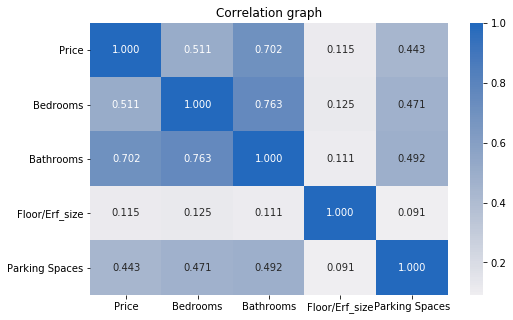

In [34]:
plt.figure(figsize = [8, 5])
plt.title('Correlation graph')
sb.heatmap(property[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

The dark colours show that there is correltion between the corresponding figures. We observe a high correlation between Bathrooms and bedroom, shown by the dark color, we also see a positive correlation between bathrooms and our dependant variable which is price. Although not as significant as thebathroom, bedroom has a reatively high reltio with price. The light grey shows low correlation. like parking space and floor/erf size. Which i would think are correlated becasue you need more spaces for more parking space. But floor space seems to be not correlated to any of the other features.

### Checking for multicollinearity.

In [35]:
numeric_varss = property[['Price', 'Bedrooms', 'Bathrooms', 'Floor/Erf_size', 'Parking Spaces']]
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_varss.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_varss.values, i) for i in range(len(numeric_varss.columns
                                                                                       ))]
vif_data

,feature,VIF
0,Price,3.65695
1,Bedrooms,10.97130
2,Bathrooms,14.69326
3,Floor/Erf_size,1.07245
4,Parking Spaces,3.03780


In [36]:
def graphlabels(xlabel, ylabel, title):
    plt.ylabel(ylabel,fontsize=15)
    plt.xlabel(xlabel,fontsize=15)
    plt.title(title, fontsize=15, bbox={'facecolor':'0.8', 'pad':5});

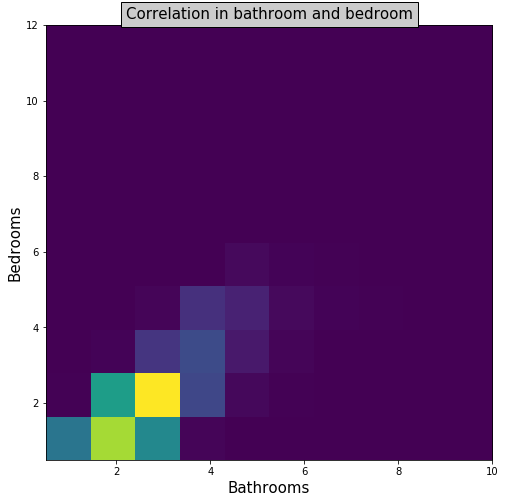

In [37]:
plt.figure(figsize=[8, 8])
plt.ticklabel_format(style = 'plain')
plt.hist2d(data=property, x='Bedrooms', y="Bathrooms" );
graphlabels('Bathrooms', 'Bedrooms', 'Correlation in bathroom and bedroom' )

Great multicollinearity between bedrooms and Bathroom with a Variance inflation factor of over 10 on both features which explains the high correlation we see in the graph above as well. It is more likely like houses with more rooms have more bathrooms.

## Price and size proportion by property type

### Inverse relationship of by Price and Price per square meter by property type

Free standing houses are on average more expensive than other residential properties, followed by townhouses then the least expensive being apartments without considering the size. We can however notice an inverse relationship when it comes to price per square meter. Houses are the cheapest per square meter as they have bigger Erf size than the other 2 types. On the opposite end Apartments are the most expensive per square meter as they have smaller floor sizes. Townhouses are in between but towards the higher end of the apartment prices. Free standing houses have on average 3 bedrooms and 2 bathrooms which is similar to townshouses. There is also a noticeale bulge in 4 bedrooms for houese and 1 bathroom.  Apartments have a great bulge in 2 bedrooms and 1 bathroom. They do however have noticeable bulges in in 1 and 3 bedrooms and 2 bathrooms. 

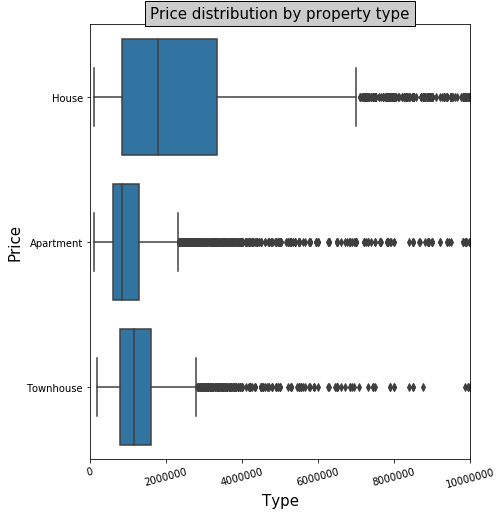

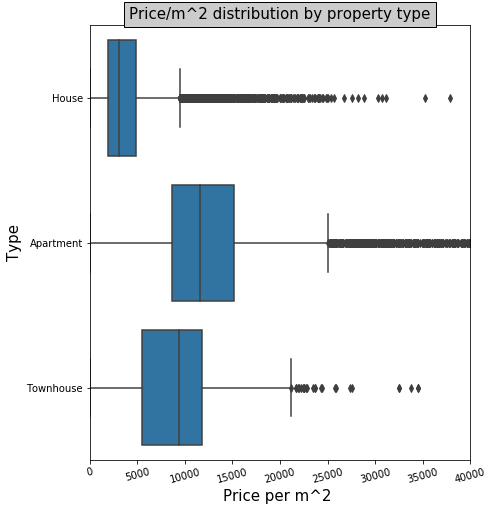

In [38]:
plt.figure(figsize=[15, 8])
plt.subplot(1, 2, 1)
plt.xlim(0,10000000)
plt.ticklabel_format(style = 'plain');
sb.boxplot(data=property, x='Price', y='Type', color=base_color)
plt.xticks(rotation=15);
graphlabels('Type', 'Price', 'Price distribution by property type')

plt.figure(figsize=[15, 8])
plt.subplot(1, 2, 2)
plt.ticklabel_format(style = 'plain');
plt.xlim(0,40000)
sb.boxplot(data=property, y='Type', x='Price/m^2', color=base_color)
plt.xticks(rotation=15);
graphlabels('Price per m^2 ', 'Type', 'Price/m^2 distribution by property type')


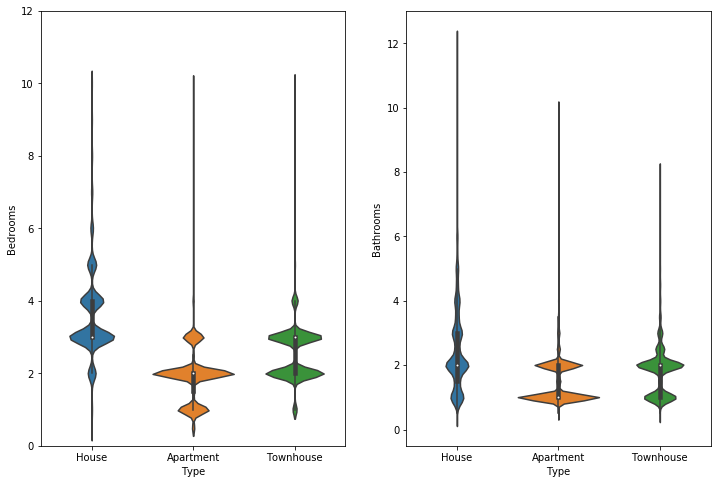

In [39]:
plt.figure(figsize=[12, 8])
plt.subplot(1, 2, 1)
sb.violinplot(data=property, x='Type', y='Bedrooms');
plt.ylim(0,12)

plt.subplot(1, 2, 2)
sb.violinplot(data=property, x='Type', y='Bathrooms');

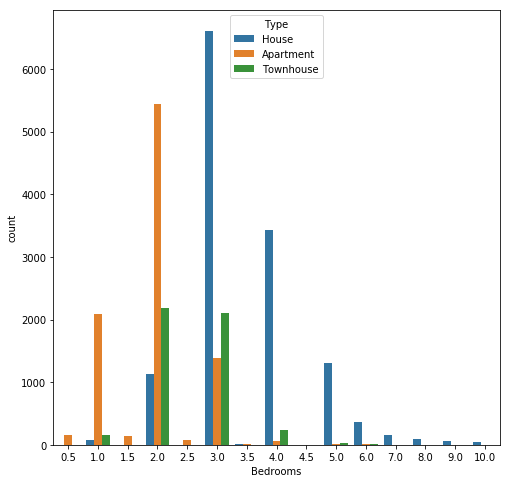

In [40]:
plt.figure(figsize=[8, 8])
sb.countplot(data = property, x = 'Bedrooms', hue = 'Type')

Most houses have 3 bedrooms and 2 bathrooms. We do however see a noticeable bulges on 4 bedroom houses. Apartments on the other have mostly have 2 bedrooms and one bathroom on avergar. We do see a great bulge in 1 and 3 bathrom apartments and aparments wwith 2 bathroom. Townouses are very similar to houses on average but we do see a bullge in 2 bedrooms townhouses and townhouses wit 1 bathroom.  

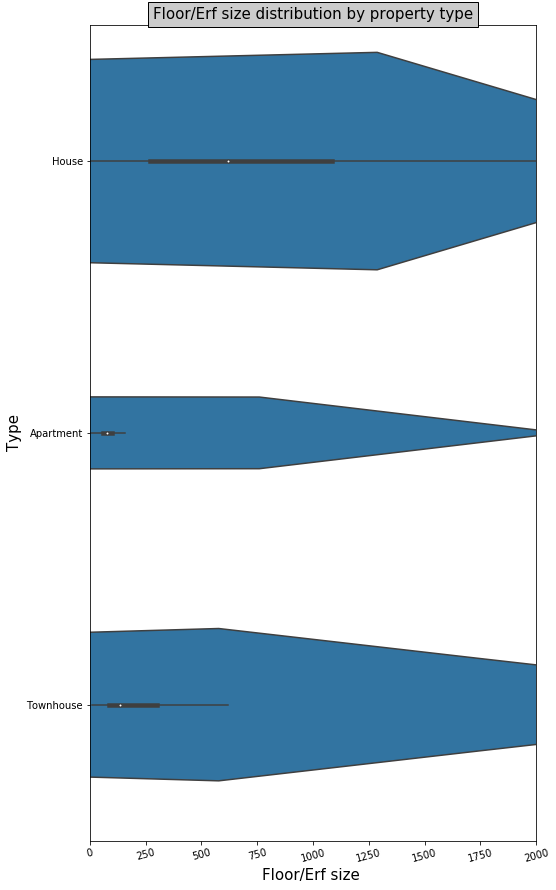

In [41]:
plt.figure(figsize=[8, 15])
plt.ticklabel_format(style = 'plain');
plt.xlim(0,2000)
sb.violinplot(data=property, y='Type', x='Floor/Erf_size', color=base_color)
plt.xticks(rotation=15);
graphlabels('Floor/Erf size ', 'Type', 'Floor/Erf size distribution by property type')

Houses have an average of 750m2 in stand size. Townhouses have a 

### Most selling surburb

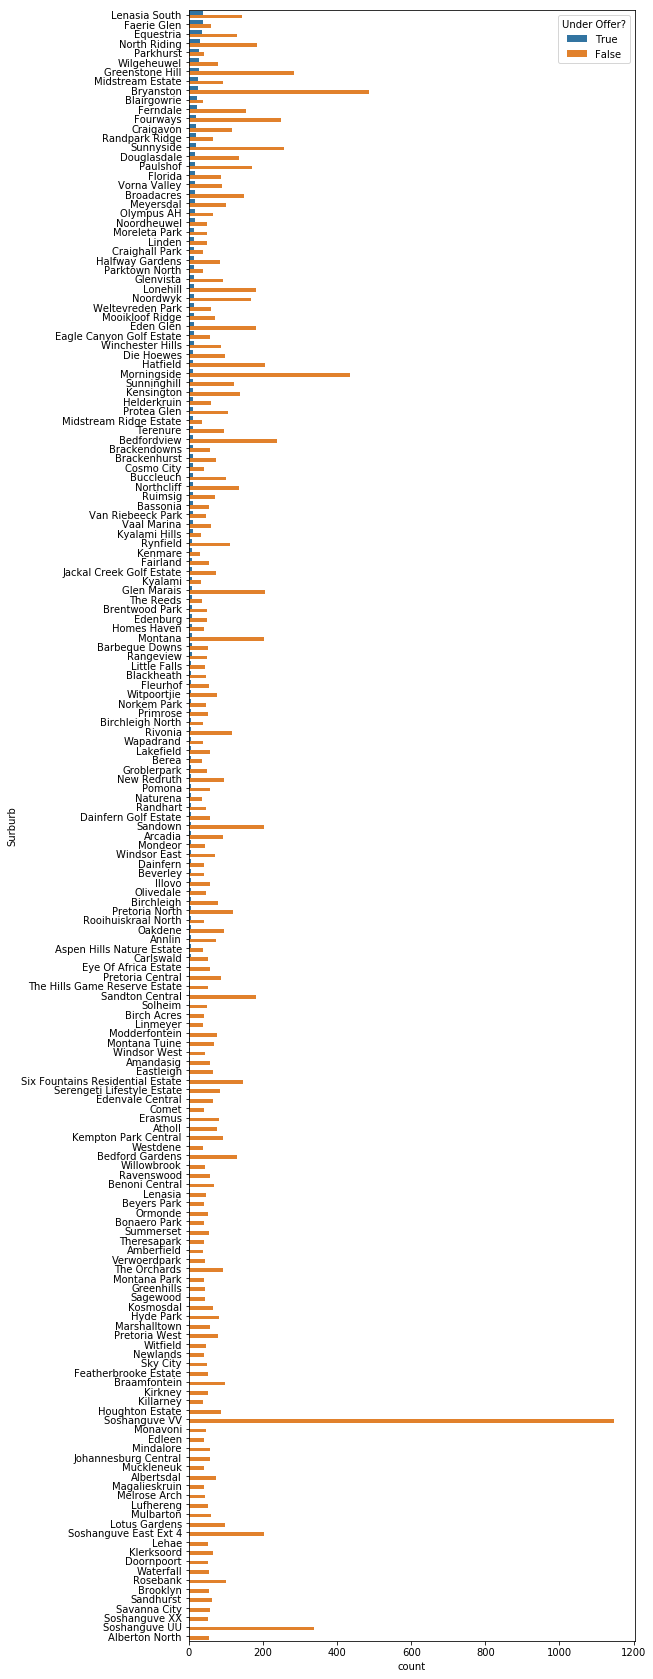

In [42]:
plt.figure(figsize=[8, 30])
under_offer_order=['True', 'False']
ordered=propt.groupby('Surburb')['Under Offer?'].sum().sort_values(ascending=False).index
sb.countplot(data = propt, y = 'Surburb', hue = 'Under Offer?', order=ordered, hue_order=[True, False]);

In [43]:
top_10_bought_surburbs = propt[propt['Surburb'].isin(ordered[:15])]
#top_10_bought_surburbs

On the day the data was extracted these were the 10 most selling (had interested buyers- under offer) surburbs:
'Bryanston', 'Blairgowrie', 'Greenstone Hill', 'North Riding',
       'Equestria', 'Midstream Estate', 'Faerie Glen', 'Parkhurst',
       'Wilgeheuwel', 'Lenasia South'],



### Top 10 surburbs with high demand and supply 

Below we can see the surburbs that had the most under offers and the most number of properties sold on the day the data wa extracted. Properties sold in the surburbs Bryanston, Greenstone Hill, North Riding, Fourways, Sunnyside are met by a higher demand as well.

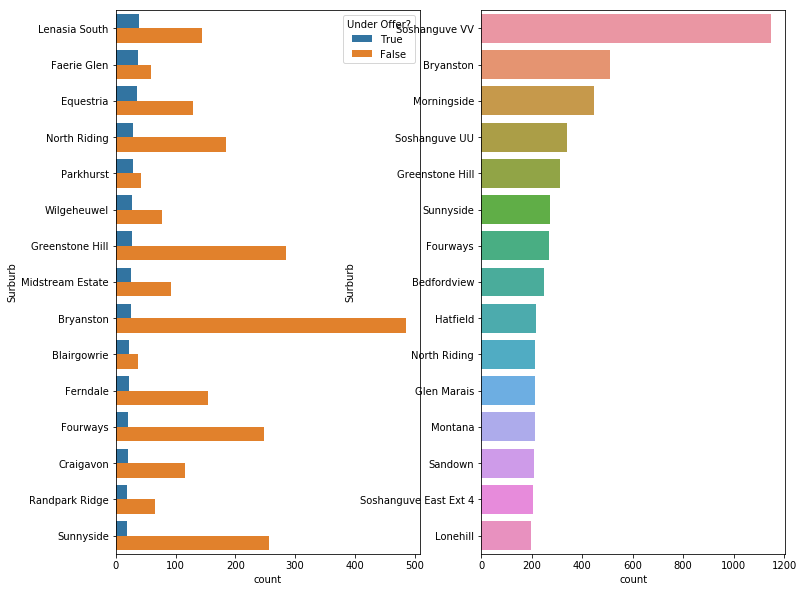

In [44]:
plt.figure(figsize=[12, 10])
plt.subplot(1, 2, 1)
#ordered3=top_10_bought_surburbs[top_10_bought_surburbs]
sb.countplot(data =top_10_bought_surburbs , y = 'Surburb', hue = 'Under Offer?', order=ordered[:15],hue_order=[True, False]);
plt.subplot(1, 2, 2)

sb.countplot(data =top_selling_10_surburbs , y = 'Surburb', order=ordered1[:15],hue_order=[True, False]);


In [45]:
supply_met_by_demand=top_selling_10_surburbs[top_selling_10_surburbs['Surburb'].isin(top_10_bought_surburbs['Surburb'])]
supply_met_by_demand.Surburb.unique()

array(['Bryanston', 'Greenstone Hill', 'North Riding', 'Fourways',
       'Sunnyside'], dtype=object)

The surburbs with the highest number of sold properties that are met by a high number of people buying are Bryanston,.Greenstone Hill, North Riding, 'ourways, Sunnyside/

### Do rooms have an effect of property price?
There is a relatively high positive correlation between the number of rooms (both bath and bed) to the price of the property. 

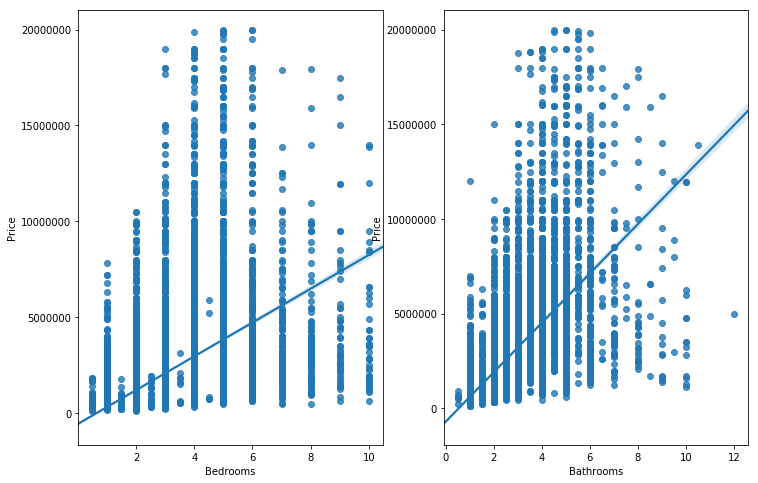

In [46]:
plt.figure(figsize=[12, 8])
plt.subplot(1, 2, 1)
plt.ticklabel_format(style = 'plain')
sb.regplot(data=property, x='Bedrooms', y="Price" );

plt.subplot(1, 2, 2)

plt.ticklabel_format(style = 'plain')
sb.regplot(data=property, x='Bathrooms', y="Price" );


### Price reduction and under offer by type:

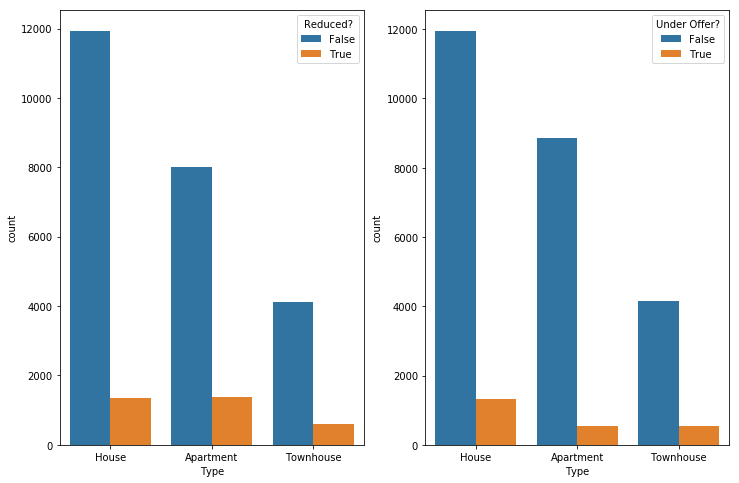

In [47]:
plt.figure(figsize=[12, 8])
plt.subplot(1, 2, 1);
sb.countplot(data = property, x = 'Type', hue = 'Reduced?')

plt.subplot(1, 2, 2);
sb.countplot(data = property, x = 'Type', hue = 'Under Offer?')



More apartments have their prices reduced from the initial market price than other property types. More houses have offers against them than other property types. 

### Is there a relationship between property price reduction and under offers?

Seemingly not. None of the properties that are reduced have offers against them. We see under offeres on properties that kept their original entry price or they houses are not that attractive to buyers?

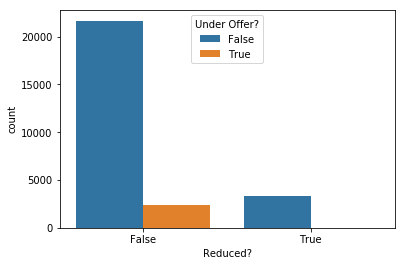

In [48]:
sb.countplot(data = property, x = 'Reduced?', hue = 'Under Offer?')

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Is there a correlation of bedroom and bathrooms by property type.

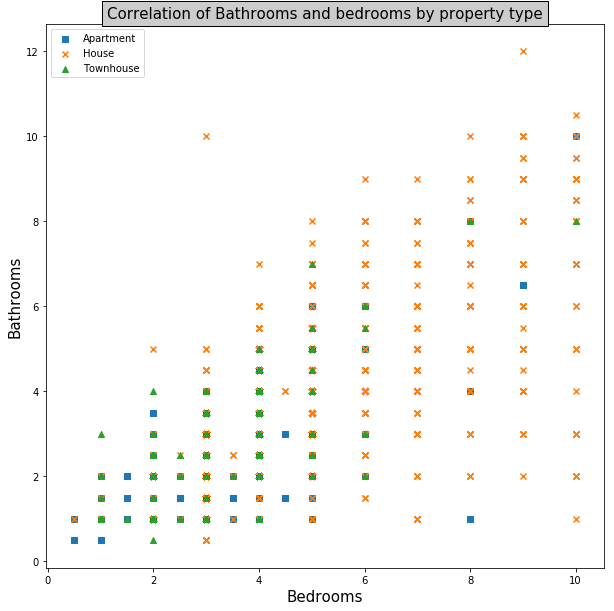

In [49]:
plt.figure(figsize=[10, 10])
graphlabels( 'Bedrooms', 'Bathrooms','Correlation of Bathrooms and bedrooms by property type')
ttype_markers = [['Apartment', 's'],  ['House', 'x'], ['Townhouse','^']]

for ttype, marker in ttype_markers:
    plot_data=property[property['Type']== ttype]
    plt.scatter(data = plot_data, x = 'Bedrooms', y = 'Bathrooms', marker = marker)
    
plt.legend(['Apartment','House','Townhouse'])


There is a correlation between bedroom and bathrooms by property type. Houses have on average more rooms than other property types and we can also see that this is matched by a high number of bathrooms too.

### Is the positive correlation between rooms and price by property type?



/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


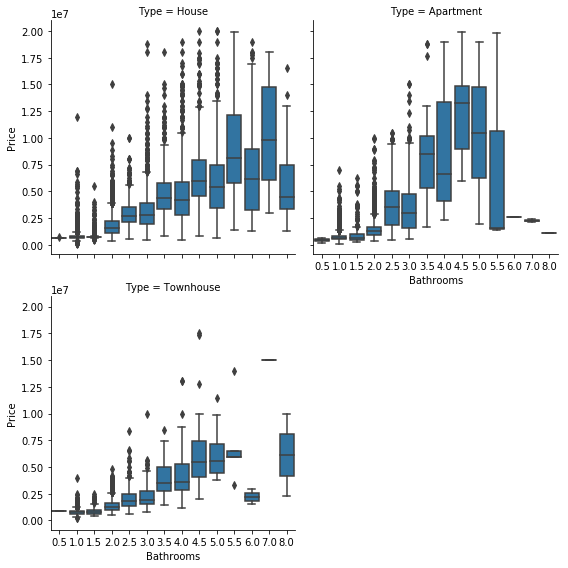

In [50]:

g = sb.FacetGrid(data = property, col = 'Type', col_wrap=2, size = 4);

g.map(sb.boxplot, 'Bathrooms', 'Price')

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


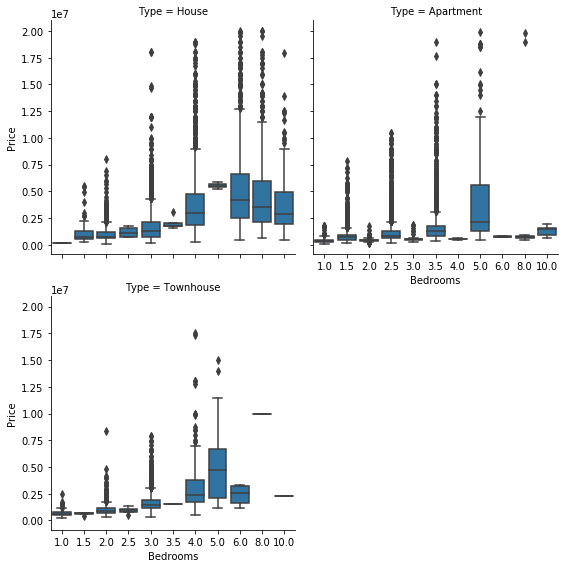

In [51]:


g = sb.FacetGrid(data = property, col = 'Type', col_wrap=2, size = 4)
g.map(sb.boxplot, 'Bedrooms', 'Price')

We can still see that positive relationship between bedrooms and price in property type house and townhouses, but not so much in apaartments. I am guessing its becasue most apartments have 2 rooms. The positive relationship beween bathrooms and price can still be seen event when split by type.

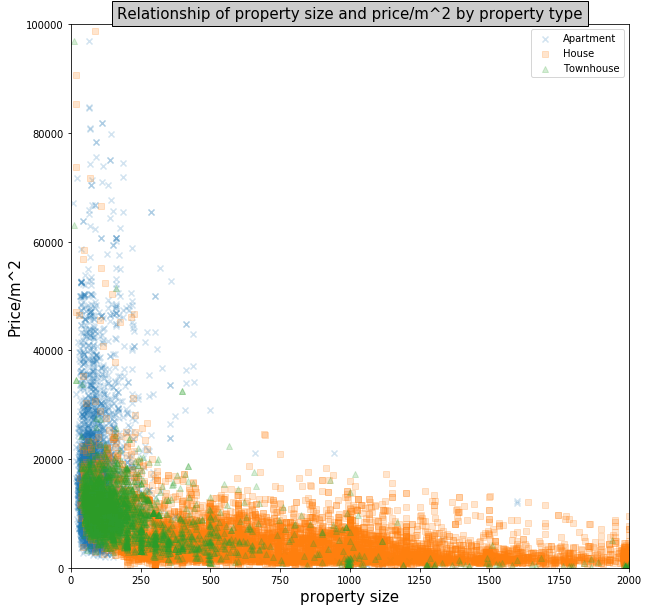

In [52]:
plt.figure(figsize=[10, 10])
graphlabels( 'property size', 'Price/m^2','Relationship of property size and price/m^2 by property type');
ttype_markerss = [['Apartment', 'x'],  ['House', 's'], ['Townhouse','^']];
plt.ticklabel_format(style = 'plain');
plt.ylim(0,100000)
plt.xlim(0,2000)
for ttypes, marker in ttype_markerss:
    plot_data=property[property['Type']== ttypes]
    plt.scatter(data = plot_data, x = 'Floor/Erf_size', y = 'Price/m^2', alpha = 1/5, marker = marker)
plt.legend(['Apartment','House','Townhouse']);




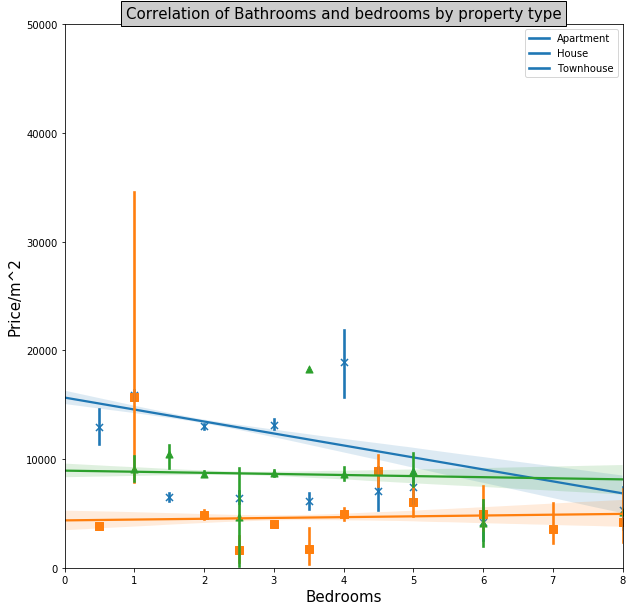

In [53]:
plt.figure(figsize=[10, 10])
graphlabels( 'Bedrooms', 'Price/m^2','Correlation of Bathrooms and bedrooms by property type');
ttype_markerss = [['Apartment', 'x'],  ['House', 's'], ['Townhouse','^']];
plt.ticklabel_format(style = 'plain');
plt.ylim(0,50000)
plt.xlim(0,8)
for ttypes, marker in ttype_markerss:
    plot_data=property[property['Type']== ttypes]
    sb.regplot(data = plot_data, x = 'Bedrooms', y = 'Price/m^2', x_jitter = 0.1,  x_estimator=np.mean,
               marker = marker)
plt.legend(['Apartment','House','Townhouse']);




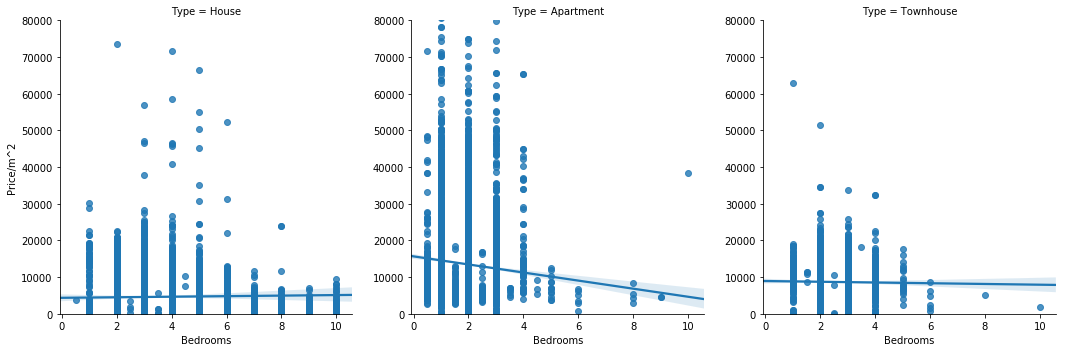

In [54]:
g = sb.lmplot(x = 'Bedrooms', y = 'Price/m^2', col="Type", data=property)
g.set(ylim=(0, 80000))

In [55]:

surburbs = property.groupby('Surburb').size()
surburbs_with_more_than_2hundred_props = surburbs[surburbs<210]
surburb_to_remove=surburbs_with_more_than_2hundred_props.index.tolist() 
surb=property[property.Surburb.isin(surburb_to_remove)== False]
surb1= surb[(surb['Surburb'] != 'Soshanguve VV')]
surb2=surb[(surb['Price/m^2'] < 30000)]

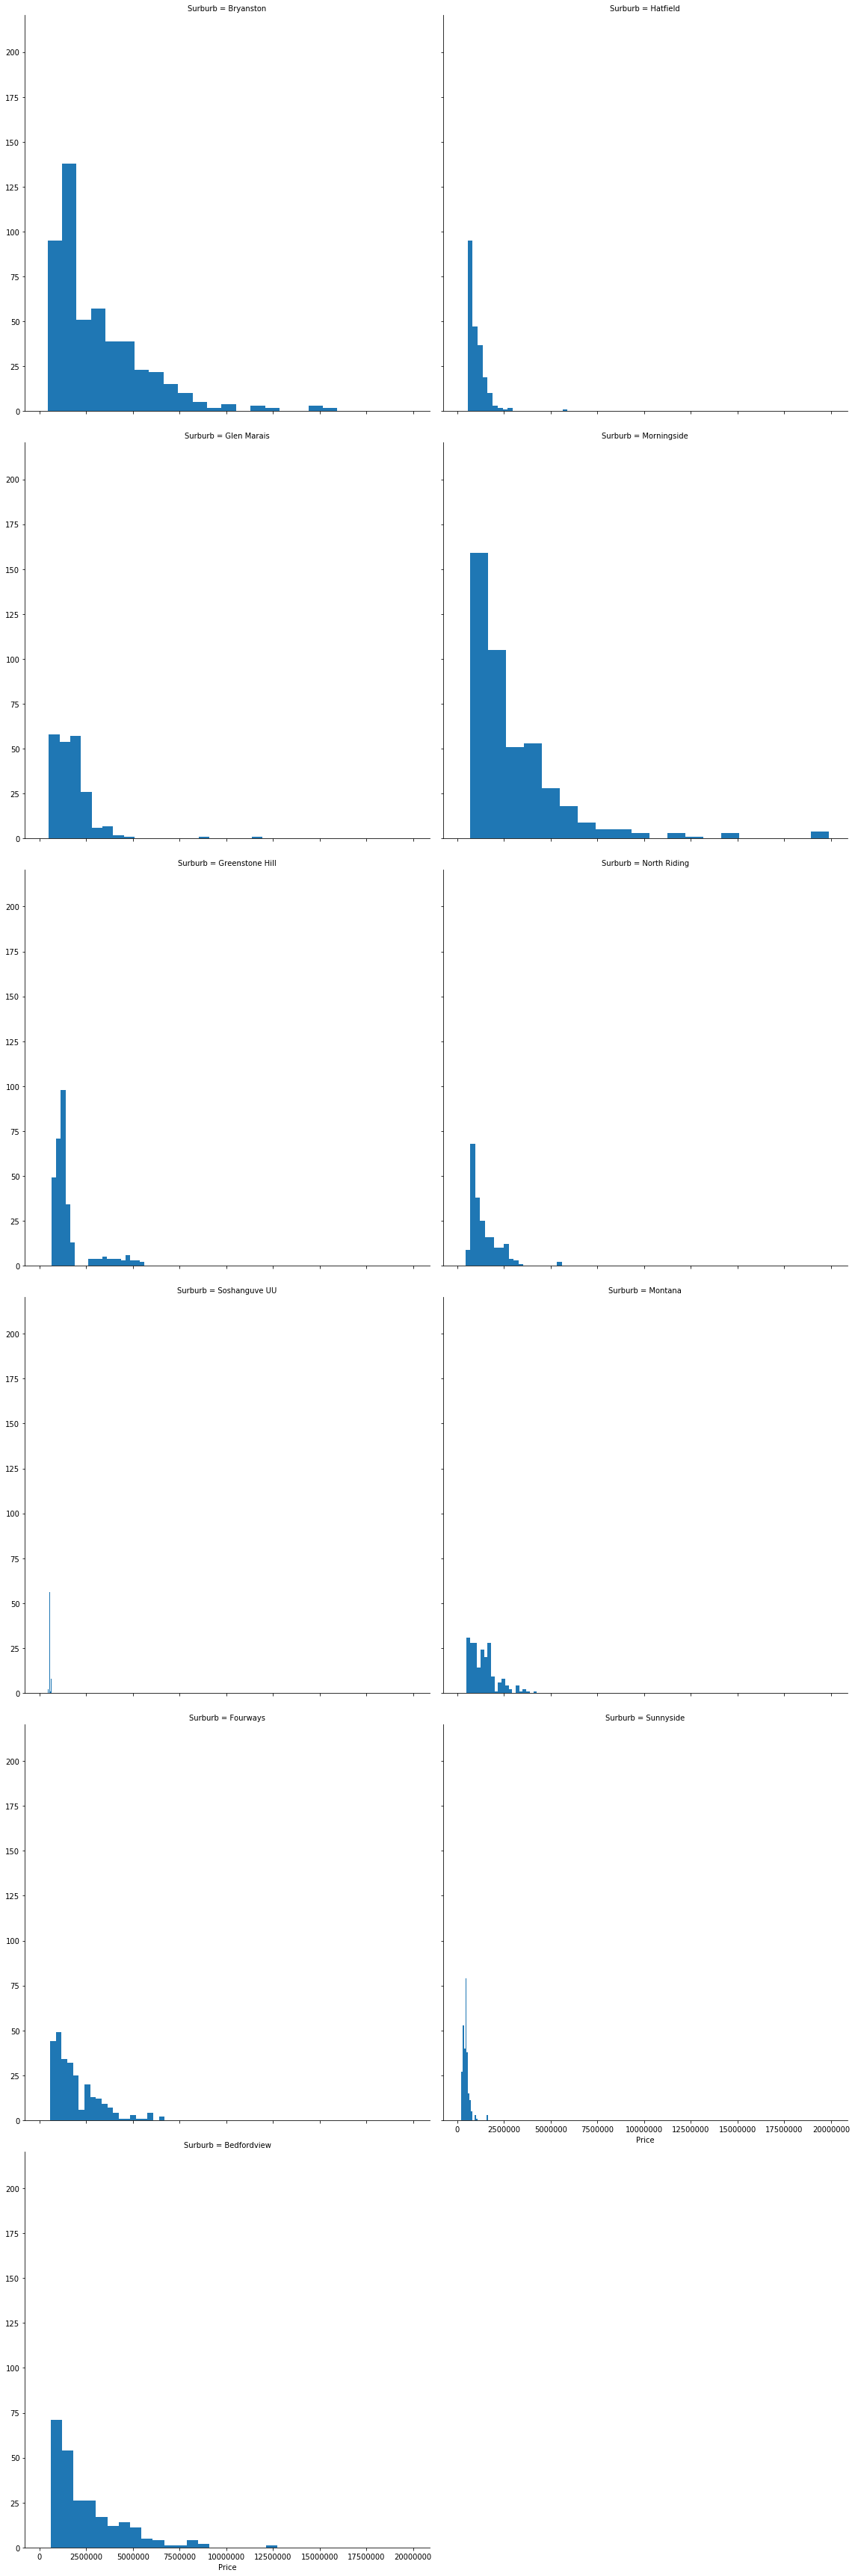

In [56]:

plt.figure(figsize=[10, 14])
s = sb.FacetGrid(data = surb1, col = 'Surburb', col_wrap=2, size=8)
plt.ticklabel_format(style = 'plain')
s.map(plt.hist, 'Price', bins=20)

### What types of properties are people buying and where?
Focusing on the properties of the top 15 surburbs with under offers, we notice a good variety of the property types except for Blairgowrie, Lenesia South, and SunnySide where ther are no Townhouse sales. Parkhurst seems to only have houses only. From the house proportion and the number of most bought surburbs not having townhouses we can say that houses are the most bough followed by apartments. Most houses are 3-4 bedrooms whilst the apartments bought are 1-2 bedrooms with 2 bedrooms dominating the apartment markert. Most surburbs have a flat or negative relationship between number of Bedrooms and price per square meter meaning you get more value for properties with more rooms per square meter. The graph below shows that houses are cheaper by price/m^2 followed by townhouses then apartments. Most of these surburb properties have peaks on more that the average average R4000 per square meter.  Bryanston, Craigavon, North Riding, GreenStone hill and fourways seem to be on the more expenive side than other but we saw that 3/5 of these surburbs have high supply met by high demand so we would also say that demand pushes prices up. 

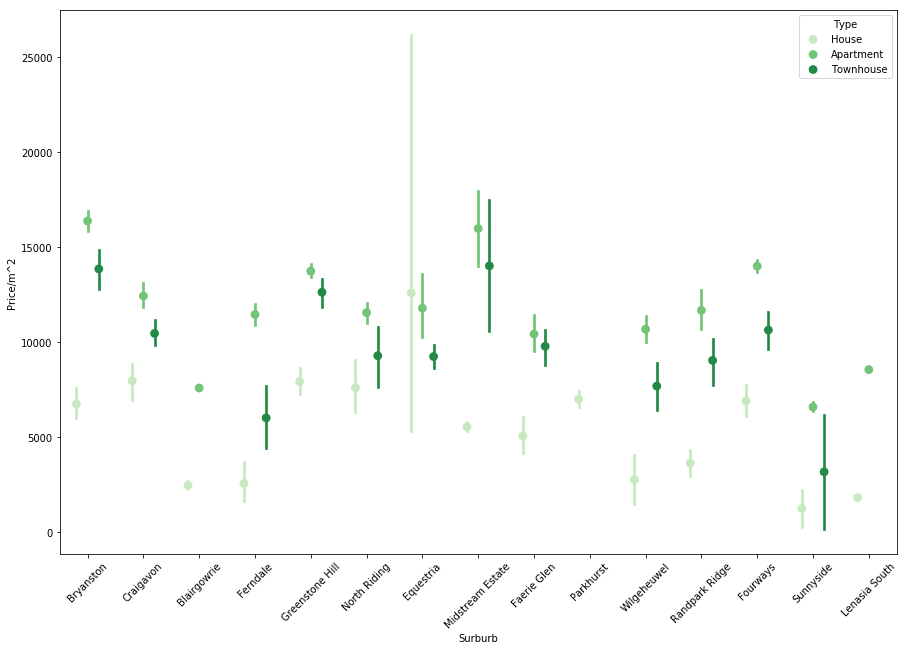

In [58]:
plt.figure(figsize=[15, 10])
ax = sb.pointplot(data = top_10_bought_surburbs, x = 'Surburb', y = 'Price/m^2', hue = 'Type',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.xticks(rotation=45)
plt.show();

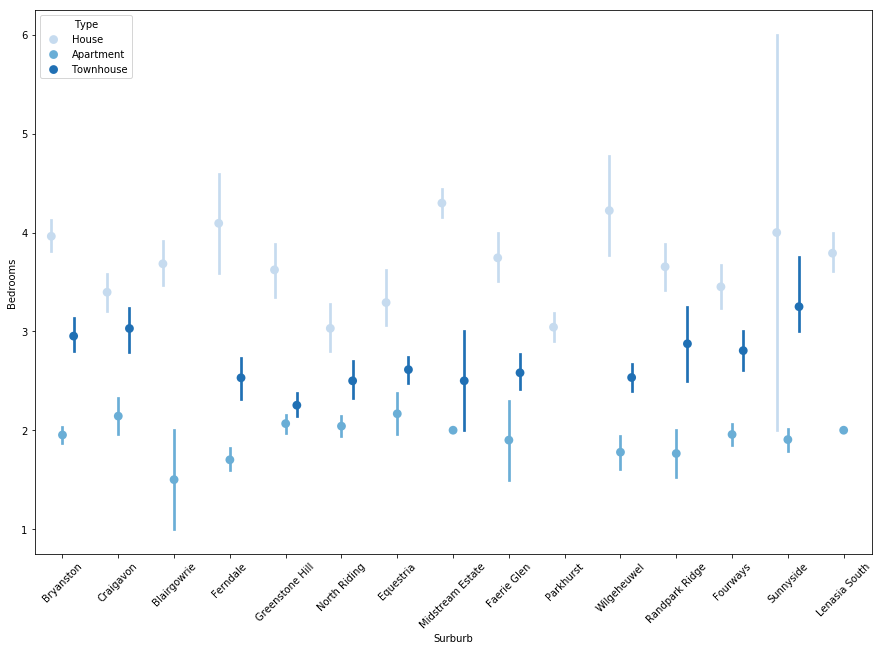

In [60]:
plt.figure(figsize=[15, 10])
ax = sb.pointplot(data = top_10_bought_surburbs, x = 'Surburb', y = 'Bedrooms', hue = 'Type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xticks(rotation=45)
plt.show();

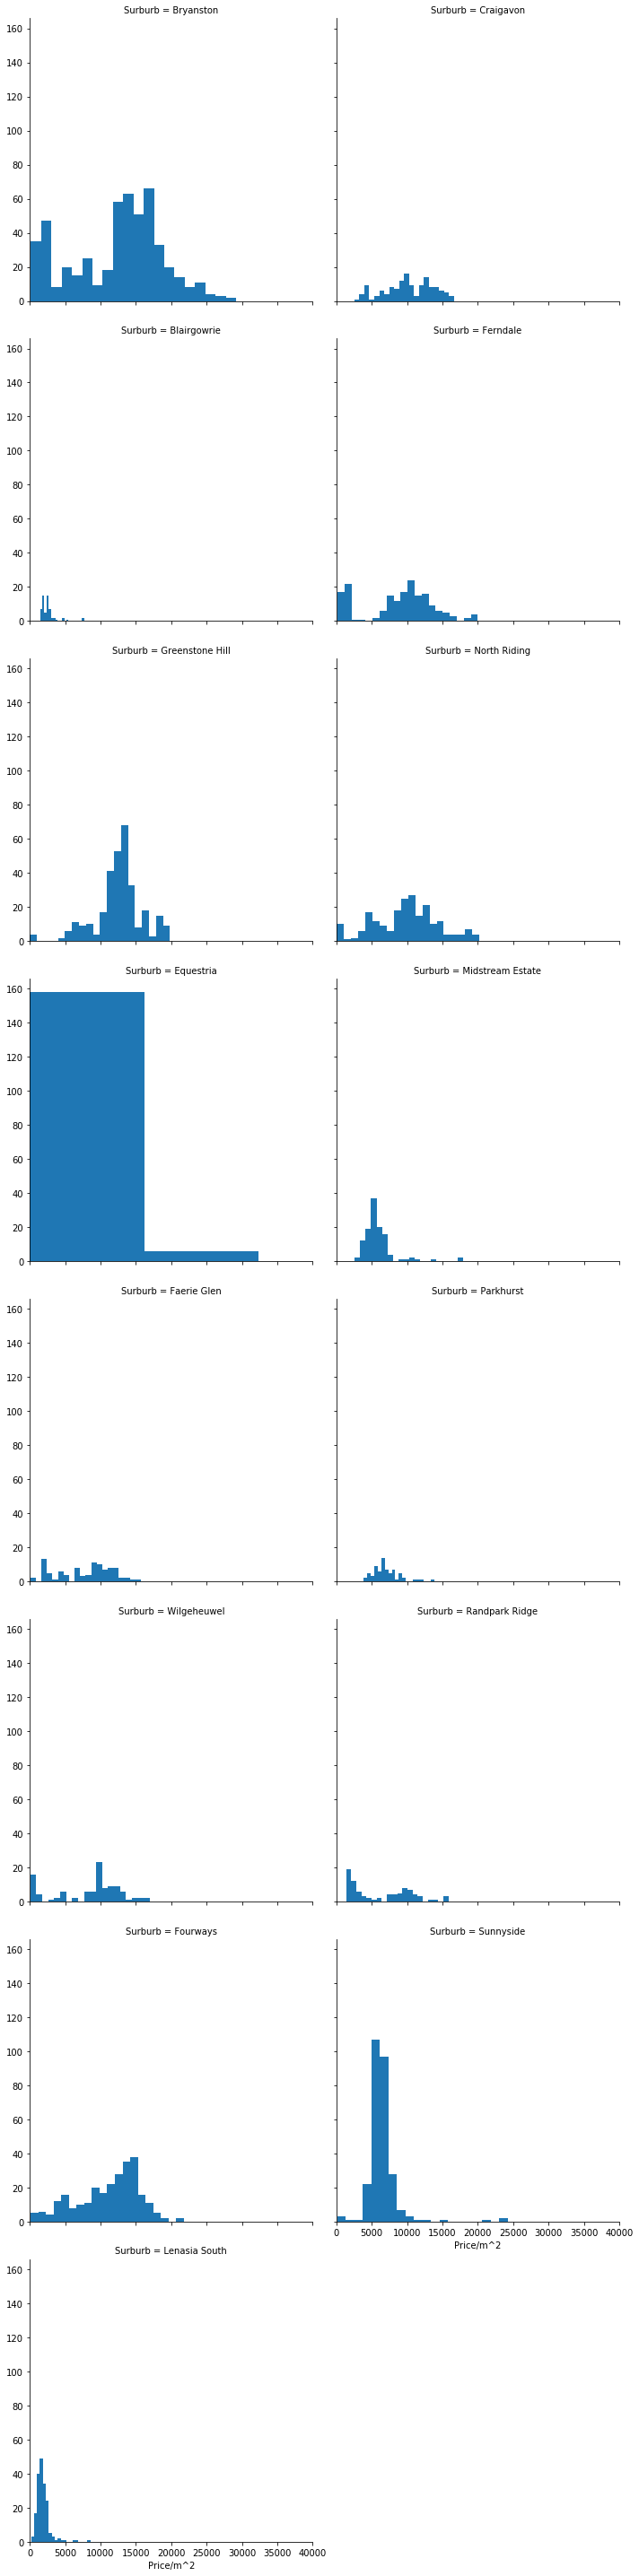

In [57]:
plt.figure(figsize=[10, 14])
s = sb.FacetGrid(data = top_10_bought_surburbs, col = 'Surburb', col_wrap=2, size=5)
plt.xlim(0,40000)
plt.ticklabel_format(style = 'plain')
s.map(plt.hist, 'Price/m^2', bins=20)

In [62]:
g = sb.FacetGrid(data = top_10_bought_surburbs 
                 , col = 'Type', row = 'Surburb', size =15, palette = 'Greens');
g.map(sb.regplot, 'Bedrooms', 'Price/m^2')
